In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import torch
import numpy as np
from tqdm import tqdm
import json
import pandas as pd
import seaborn as sns
#from heatmap import heatmap, corrplot
from matplotlib import pyplot as plt

In [ ]:
#!pip install heatmapz

In [ ]:
%cd /content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA

/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA


In [ ]:
# fn = "anom_855_hp_annotated.json"
# contents = list(map(lambda x: json.loads(x), open(fn,"r").read().split("\n")[:-1]))
# (contents)

In [ ]:
#df = pd.read_json("anom_855_hp_annotated.json", lines = True)
df = pd.read_json("anom_870_wb_annotated.json", lines = True)


#df.to_csv()

In [ ]:
df

,annotations,captures,global,t_rel,anom
0,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:41:59.903014...,"{'core:datatype': 'cf32_le', 'core:description...",0.000000,False
1,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:41:59.909046...,"{'core:datatype': 'cf32_le', 'core:description...",0.006032,False
2,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:41:59.919325...,"{'core:datatype': 'cf32_le', 'core:description...",0.016311,False
3,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:41:59.924278...,"{'core:datatype': 'cf32_le', 'core:description...",0.021264,False
4,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:41:59.93418Z...,"{'core:datatype': 'cf32_le', 'core:description...",0.031166,False
...,...,...,...,...,...
36123,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:46:26.232868...,"{'core:datatype': 'cf32_le', 'core:description...",266.329854,False
36124,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:46:26.23595Z...,"{'core:datatype': 'cf32_le', 'core:description...",266.332936,False
36125,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:46:26.245875...,"{'core:datatype': 'cf32_le', 'core:description...",266.342861,False
36126,"[{'core:description': 'WCDMA', 'core:freq_lowe...",[{'core:datetime': '2021-09-01T20:46:26.248957...,"{'core:datatype': 'cf32_le', 'core:description...",266.345943,False


In [ ]:
df_annot = pd.io.json.json_normalize(df["annotations"][0])
df_annot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,core:description,core:freq_lower_edge,core:freq_upper_edge,core:global_index,core:sample_count,core:sample_start,deepsig:angle,deepsig:confidence,deepsig:fractional_seconds,deepsig:full_seconds,deepsig:rssi,deepsig:snr_estimate,core:freq_center,core:bandwidth
0,WCDMA,8.747907e+08,8.789398e+08,77777083524,65536,17896964096,0.0,0.997350,0.903014,1630528919,-10.371817,7.376613,8.768652e+08,4.149127e+06
1,LTE,8.799937e+08,8.897915e+08,77777083524,65536,17896964096,0.0,0.997530,0.903014,1630528919,2.060314,19.808745,8.848926e+08,9.797789e+06
2,CDMA2000,8.915741e+08,8.940705e+08,77777083524,65536,17896964096,0.0,0.845466,0.903014,1630528919,2.137661,19.886092,8.928223e+08,2.496397e+06


In [ ]:
# Merge entire dataframes

df_annot_all = []

for index, row in df.iterrows():
 #if index <= 2:   
    df_annot = "df_annot_" + str(index)
    df_annot = pd.io.json.json_normalize(df["annotations"][index])

    
    df_global = pd.io.json.json_normalize(df["global"][index])
    sample_rate = df_global["core:sample_rate"].values
    sample_rate = sample_rate[0]
    df_annot.insert(df_annot.shape[1], "sample_rate", [sample_rate] * df_annot.shape[0])
    


    df_captures = pd.io.json.json_normalize(df["captures"][index])
    core_freq = df_captures['core:frequency'].values
    core_freq = core_freq[0]
    df_annot.insert(df_annot.shape[1], "core_frequency", [core_freq] * df_annot.shape[0])
  

    t_rel = df["t_rel"].iloc[index]
    df_annot.insert(df_annot.shape[1], "t_rel", [t_rel] * df_annot.shape[0])

    anom_flag = df["anom"].iloc[index]
    df_annot.insert(df_annot.shape[1], "Anomaly Flag", [anom_flag] * df_annot.shape[0])

    #print ("DF_ANNOT:", df_annot)

    df_annot_all.append (df_annot)

df_annot_final = pd.concat(df_annot_all).reset_index(drop=True)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
df_annot_final

,core:description,core:freq_lower_edge,core:freq_upper_edge,core:global_index,core:sample_count,core:sample_start,deepsig:angle,deepsig:confidence,deepsig:fractional_seconds,deepsig:full_seconds,deepsig:rssi,deepsig:snr_estimate,core:freq_center,core:bandwidth,sample_rate,core_frequency,t_rel,Anomaly Flag
0,WCDMA,8.747907e+08,8.789398e+08,7.777708e+10,65536.0,1.789696e+10,0.0,0.997350,0.903014,1.630529e+09,-10.371817,7.376613,8.768652e+08,4.149127e+06,40000000.0,890000000.0,0.000000,0.0
1,LTE,8.799937e+08,8.897915e+08,7.777708e+10,65536.0,1.789696e+10,0.0,0.997530,0.903014,1.630529e+09,2.060314,19.808745,8.848926e+08,9.797789e+06,40000000.0,890000000.0,0.000000,0.0
2,CDMA2000,8.915741e+08,8.940705e+08,7.777708e+10,65536.0,1.789696e+10,0.0,0.845466,0.903014,1.630529e+09,2.137661,19.886092,8.928223e+08,2.496397e+06,40000000.0,890000000.0,0.000000,0.0
3,WCDMA,8.747542e+08,8.789763e+08,7.777732e+10,65536.0,1.789703e+10,0.0,0.998995,0.909046,1.630529e+09,-10.738591,6.119056,8.768652e+08,4.222161e+06,40000000.0,890000000.0,0.006032,0.0
4,LTE,8.803292e+08,8.895340e+08,7.777732e+10,65536.0,1.789703e+10,0.0,0.994650,0.909046,1.630529e+09,4.335349,21.192996,8.849316e+08,9.204817e+06,40000000.0,890000000.0,0.006032,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114687,LTE,8.797696e+08,8.899765e+08,8.843092e+10,65536.0,2.026452e+10,0.0,0.997150,0.248957,1.630529e+09,3.828011,18.290458,8.848730e+08,1.020688e+07,40000000.0,890000000.0,266.345943,0.0
114688,CDMA2000,8.914097e+08,8.942349e+08,8.843092e+10,65536.0,2.026452e+10,0.0,0.996856,0.248957,1.630529e+09,1.941281,16.403728,8.928223e+08,2.825190e+06,40000000.0,890000000.0,266.345943,0.0
114689,WCDMA,8.745706e+08,8.789255e+08,8.843151e+10,65536.0,2.026458e+10,0.0,0.999789,0.263558,1.630529e+09,-8.653198,4.832456,8.767480e+08,4.354904e+06,40000000.0,890000000.0,266.360544,0.0
114690,LTE,8.803300e+08,8.897677e+08,8.843151e+10,65536.0,2.026458e+10,0.0,0.989777,0.263558,1.630529e+09,10.917154,24.402808,8.850488e+08,9.437723e+06,40000000.0,890000000.0,266.360544,0.0


In [ ]:

df_annot_final["Anomaly Flag"].unique()

array([0., 1.])

In [ ]:
#df_annot_final.to_csv(r'/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA/final_data.csv', index = False, header=True)

In [ ]:
#Normalize data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols = ['core:freq_lower_edge','t_rel','core:freq_upper_edge','core:sample_start','deepsig:confidence','deepsig:fractional_seconds','deepsig:rssi','deepsig:snr_estimate','core:freq_center','core:bandwidth']
cols_categ = ['core:description','core:global_index','core:sample_count','deepsig:angle','deepsig:full_seconds','sample_rate','core_frequency','Anomaly Flag']
df_annot_final[cols] = df_annot_final[cols].apply(pd.to_numeric, errors='coerce',axis =1)

df_annot_final[cols] = sc.fit_transform(df_annot_final[cols])
df_annot_final[cols_categ] = df_annot_final[cols_categ].astype('category').apply(lambda x: x.cat.codes)

df_annot_final



,core:description,core:freq_lower_edge,core:freq_upper_edge,core:global_index,core:sample_count,core:sample_start,deepsig:angle,deepsig:confidence,deepsig:fractional_seconds,deepsig:full_seconds,deepsig:rssi,deepsig:snr_estimate,core:freq_center,core:bandwidth,sample_rate,core_frequency,t_rel,Anomaly Flag
0,13,-1.075553,-1.250818,0,98,-1.794426,0,0.392237,1.396543,0,-1.527824,-0.837795,-1.192485,-0.526696,0,0,-1.783499,0
1,9,-0.409505,0.079401,0,98,-1.794426,0,0.394382,1.396543,0,0.217020,0.683483,-0.163512,1.124343,0,0,-1.783499,0
2,3,1.072925,0.603928,0,98,-1.794426,0,-1.415353,1.396543,0,0.227876,0.692947,0.852944,-1.009769,0,0,-1.783499,0
3,13,-1.080228,-1.246341,1,98,-1.794330,0,0.411819,1.417405,0,-1.579301,-0.991678,-1.192485,-0.505348,0,0,-1.783421,0
4,9,-0.366550,0.047845,1,98,-1.794330,0,0.360106,1.417405,0,0.536320,0.852869,-0.158505,0.951024,0,0,-1.783421,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114687,9,-0.438189,0.102080,36463,98,1.666578,0,0.389858,-0.865462,267,0.465116,0.497695,-0.166015,1.243915,0,0,1.677090,0
114688,3,1.051880,0.624080,36463,98,1.666578,0,0.386360,-0.865462,267,0.200314,0.266822,0.852944,-0.913667,0,0,1.677090,0
114689,13,-1.103726,-1.252570,36464,98,1.666674,0,0.421257,-0.814967,267,-1.286617,-1.149115,-1.207507,-0.466549,0,0,1.677280,0
114690,9,-0.366456,0.076486,36464,98,1.666674,0,0.302104,-0.814967,267,1.460074,1.245642,-0.143483,1.019100,0,0,1.677280,0


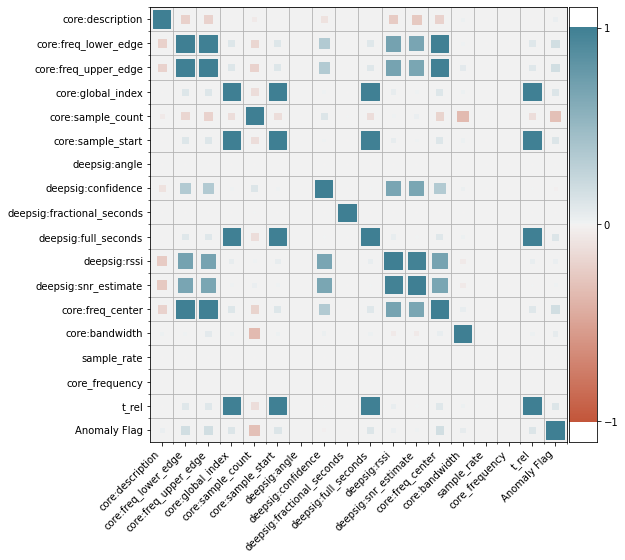

In [ ]:

# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

data = pd.read_csv('/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA/anom_855_hp_annotated_normalized.csv')
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300);


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA/anom_855_hp_annotated_normalized.csv')
df

,core:description,core:freq_lower_edge,core:freq_upper_edge,core:global_index,core:sample_count,core:sample_start,deepsig:angle,deepsig:confidence,deepsig:fractional_seconds,deepsig:full_seconds,deepsig:rssi,deepsig:snr_estimate,core:freq_center,core:bandwidth,sample_rate,core_frequency,t_rel,Anomaly Flag
0,10,-1.773420,-1.706843,1,43,1,0,1.179868,-0.435858,0,-0.868460,-1.144534,-1.740856,1.030008,0,0,-1.712957,0
1,10,-0.629337,-0.561312,2,29,2,0,-0.233816,-0.433999,0,-0.787553,-1.060373,-0.595539,1.110516,0,0,-1.712957,0
2,2,-0.629337,-0.561312,3,0,3,0,-2.005674,-0.432671,0,-0.788760,-1.061628,-0.595539,1.110516,0,0,-1.712957,0
3,10,-0.629337,-0.561312,4,10,4,0,-0.858316,-0.432627,0,-0.837229,-1.112047,-0.595539,1.110516,0,0,-1.712957,0
4,4,0.577405,0.574423,0,127,0,0,0.675990,-0.437363,0,0.966529,0.764278,0.576168,-0.021652,0,0,-1.712957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252283,4,0.582151,0.569690,94593,127,94593,0,0.435729,-0.313253,613,0.966513,0.785147,0.576168,-0.180485,0,0,1.719465,0
252284,4,0.649442,0.639562,94593,127,94593,0,0.698875,-0.313253,613,1.042061,0.863734,0.644781,-0.133878,0,0,1.719465,0
252285,6,-1.160387,-1.169682,94594,127,94594,0,0.089503,-0.276797,613,-0.776027,-0.870113,-1.165559,-0.212989,0,0,1.719524,0
252286,4,0.581862,0.569979,94594,127,94594,0,0.434632,-0.276797,613,0.963506,0.939402,0.576168,-0.170798,0,0,1.719524,0


In [ ]:
# !pwd
# !ls -lrt

In [ ]:
#df_annot_final = pd.read_csv("anom_855_hp_annotated_normalized.csv")
df_reduced_feats = df_annot_final[["core:freq_lower_edge","core:freq_upper_edge","core:global_index","core:sample_count","core:sample_start","deepsig:full_seconds","core:freq_center","core:bandwidth","t_rel","Anomaly Flag"]]


In [ ]:
df_reduced_feats

,core:freq_lower_edge,core:freq_upper_edge,core:global_index,core:sample_count,core:sample_start,deepsig:full_seconds,core:freq_center,core:bandwidth,t_rel,Anomaly Flag
0,-1.773420,-1.706843,1,43,-1.640440,0,-1.740856,1.030008,-1.712957,0
1,-0.629337,-0.561312,2,29,-1.640404,0,-0.595539,1.110516,-1.712957,0
2,-0.629337,-0.561312,3,0,-1.640368,0,-0.595539,1.110516,-1.712957,0
3,-0.629337,-0.561312,4,10,-1.640332,0,-0.595539,1.110516,-1.712957,0
4,0.577405,0.574423,0,127,-1.640476,0,0.576168,-0.021652,-1.712957,0
...,...,...,...,...,...,...,...,...,...,...
252283,0.582151,0.569690,94593,127,1.757069,613,0.576168,-0.180485,1.719465,0
252284,0.649442,0.639562,94593,127,1.757069,613,0.644781,-0.133878,1.719465,0
252285,-1.160387,-1.169682,94594,127,1.757105,613,-1.165559,-0.212989,1.719524,0
252286,0.581862,0.569979,94594,127,1.757105,613,0.576168,-0.170798,1.719524,0


In [ ]:
df_annot_final.to_csv(r'/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA/anom_870_hp_annotated_normalized.csv', index = False, header=True)

In [ ]:
df_annot_final.to_csv(r'/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA/anom_855_hp_annotated_normalized_feats.csv', index = False, header=True)

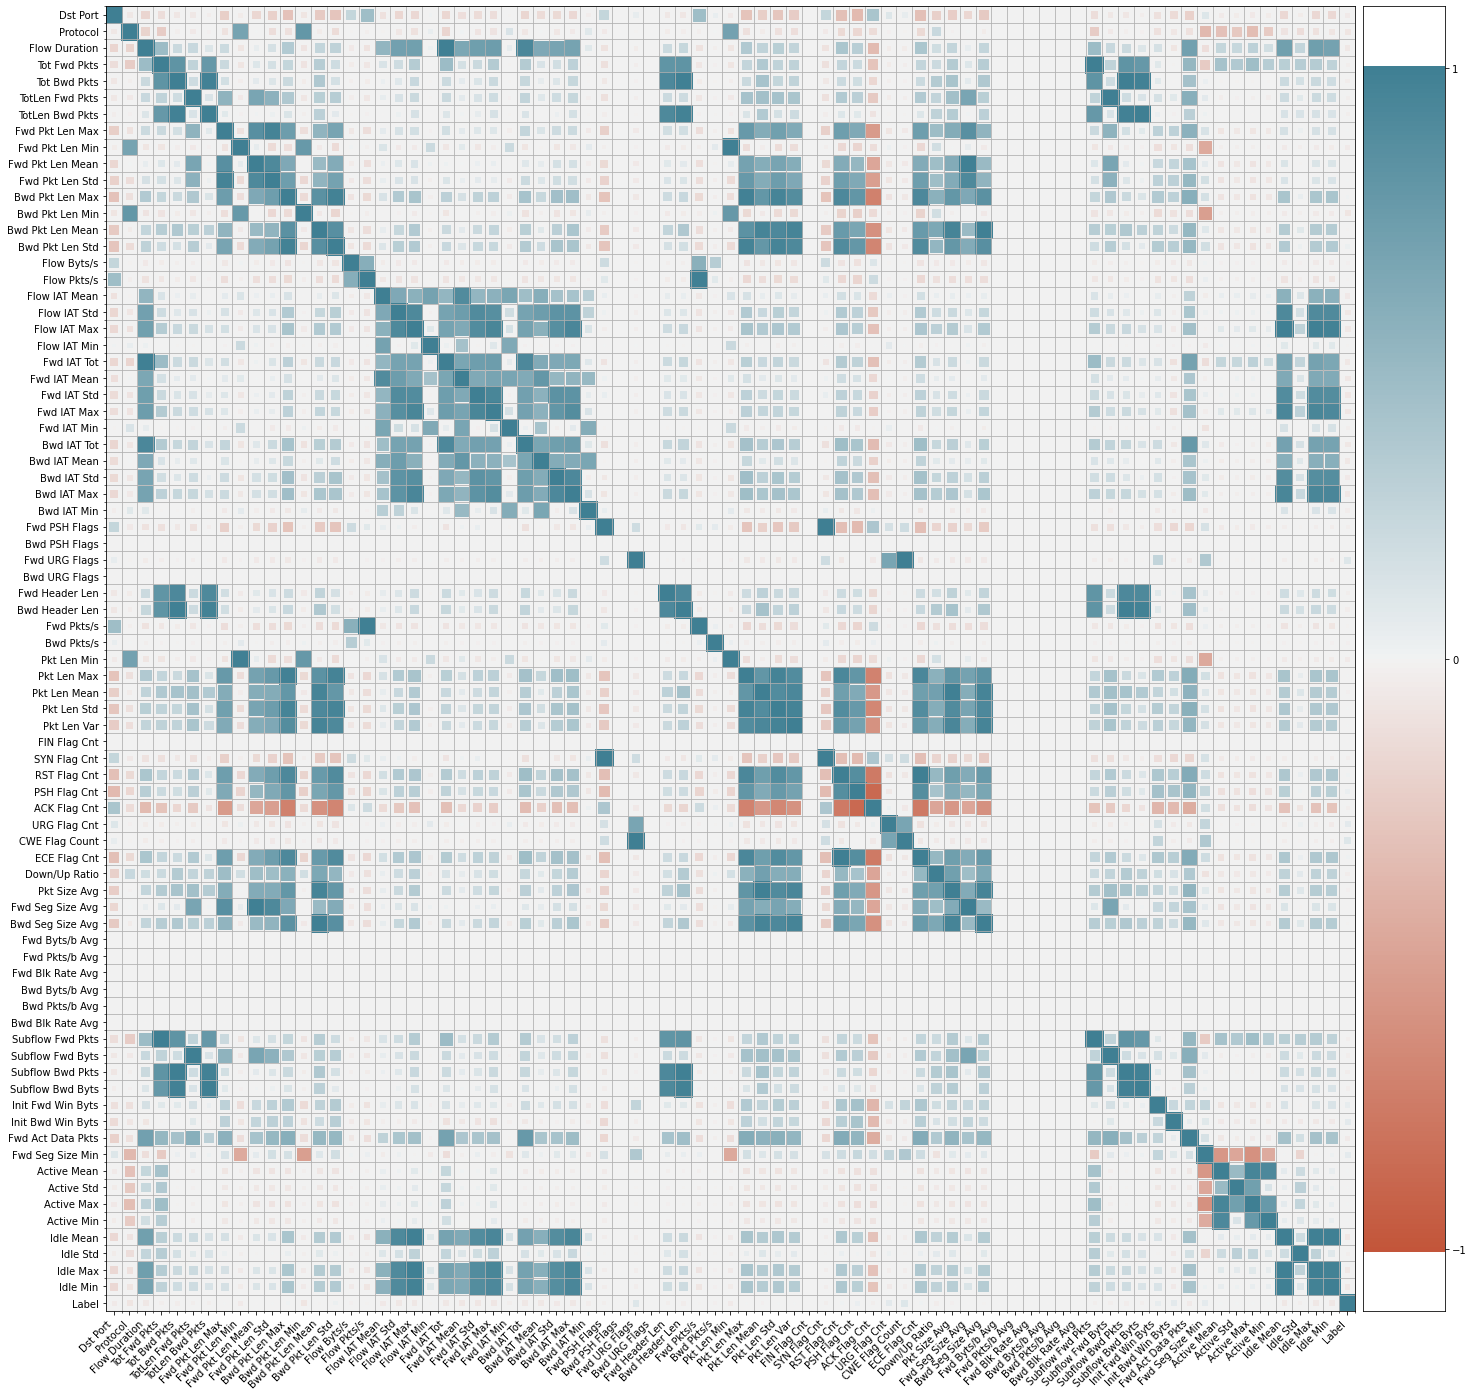

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/VRIF ANOMALY DETECTION/TCK_AE-master/TCK_AE-master/df_kae_cic_ids.csv')
plt.figure(figsize=(24, 24))
corrplot(data.corr(), size_scale=300);